In [ ]:
# Standard python libraries
import os
import requests

# Installed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
plt.rcParams.update({'font.size': 20})
sns.set(rc={'figure.figsize':(15, 11)})
sns.set(style="whitegrid", font_scale=1.5)

N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 120 # Time in seconds for automl run
TARGET_NAME = 'TARGET' # Target column name

## 1. Read data

In [ ]:
DATASET_DIR = './data/'
DATASET_NAME = 'sampled_app_train.csv'
DATASET_FULLNAME = os.path.join(DATASET_DIR, DATASET_NAME)
DATASET_URL = 'https://raw.githubusercontent.com/AILab-MLTools/LightAutoML/master/examples/data/sampled_app_train.csv'

In [ ]:
%%time

if not os.path.exists(DATASET_FULLNAME):
    os.makedirs(DATASET_DIR, exist_ok=True)

    dataset = requests.get(DATASET_URL).text
    with open(DATASET_FULLNAME, 'w') as output:
        output.write(dataset)

data = pd.read_csv(DATASET_FULLNAME)
data['EMP_DATE'] = (
    np.datetime64('2018-01-01') + np.clip(data['DAYS_EMPLOYED'], None, 0).astype(np.dtype('timedelta64[D]'))
).astype(str)

CPU times: user 253 ms, sys: 55.7 ms, total: 309 ms
Wall time: 892 ms


In [ ]:
train_data, test_data = train_test_split(data, 
                                         test_size=TEST_SIZE, 
                                         stratify=data[TARGET_NAME], 
                                         random_state=RANDOM_STATE)

## 2. Create and train model

Works identically for `TabularAutoML` and `TabularUtilizedAutoML`.

In [ ]:
%%time 

task = Task('binary')
roles = {'target': TARGET_NAME}

automl = TabularAutoML(task = task,
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_data, roles = roles, verbose = 1, log_file = 'train.log')

[23:21:56] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[23:21:56] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


[23:21:56] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[23:21:56] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[23:21:56] - time: 120.00 seconds


INFO:lightautoml.automl.presets.base:- time: 120.00 seconds


[23:21:56] - CPU: 8 cores


INFO:lightautoml.automl.presets.base:- CPU: 8 cores


[23:21:56] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[23:21:56] Train data shape: (8000, 123)



INFO:lightautoml.reader.base:Train data shape: (8000, 123)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[23:22:02] Layer 1 train process start. Time left 113.82 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 113.82 secs


[23:22:03] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187], 'embed_sizes': array([ 3,  9,  6,  8,  9,  5,  6,  6,  3, 20,  3, 39, 13,  8, 10,  3,  6,
        8,  3], dtype=int32), 'data_size': 188}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.6766013973304253
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.7009905330061847
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.7174922890239535
INFO3:lightautoml.ml_algo.tor

[23:22:08] Time limit exceeded after calculating fold 1



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 1



[23:22:08] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.7546629381803656


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.7546629381803656


[23:22:08] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[23:22:08] Time left 108.11 secs



INFO:lightautoml.automl.base:Time left 108.11 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.742077
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.749539
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.748844
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.74956
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[208]	valid's auc: 0.751132


[23:22:15] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[23:22:16] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 32, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.749603
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.75312
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.756077
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.758872
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	v

[23:22:26] Time limit exceeded after calculating fold 0



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 0



[23:22:26] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.7605133879649972


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.7605133879649972


[23:22:26] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[23:22:26] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 5000, 'learning_rate': 0.035, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.5536614	best: 0.5536614 (0)	total: 53.5ms	remaining: 4m 27s
DEBUG:lightautoml.ml_algo.boost_cb:100:	test: 0.7333900	best: 0.7336626 (98)	total: 597ms	remaining: 29s
DEBUG:lightautoml.ml_algo.boost_cb:200:	test: 0.7263445	best: 0.7430334 (123)	

[23:22:36] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.7139527378462689


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.7139527378462689


[23:22:36] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[23:22:36] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 10.77 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 10.77 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-ab1d25a5-a060-4641-b9ce-9a233124b6d9
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.5610597	best: 0.5610597 (0)	total: 4.66ms	remaining: 23.3s
DEBUG:lightautoml.ml_algo.boost_cb:100:	test: 0.7375970	best: 0.7381369 (95)	total: 451ms	remaining: 21.9s
DEBUG:lightautoml.ml_algo.boost_cb:200:	test: 0.7452251	best: 0.7497635 (130)	total: 919ms	remaining: 21.9s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.7497634588
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 130
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 131 iterations.
INFO:optuna.study.study:Trial 0 finished with value: 0.7497634587937201 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.00

[23:22:50] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 0.002570603566117598, 'min_data_in_leaf': 15}
 achieve 0.7585 auc


[23:22:50] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.002570603566117598, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 3, 'min_data_in_leaf': 15, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.5757226	best: 0.5757226 (0)	total: 4.35ms	remaining: 13s
DEBUG:lightautoml.ml_algo.boost_cb:100:	test: 0.7353785	best: 0.7353785 (100)	total: 966ms	remaining: 27.7s
DEBUG:lightautoml.ml_algo.boost_cb:200:	test: 0.73

[23:23:01] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.717589253008124


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.717589253008124


[23:23:01] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[23:23:01] Time left 54.93 secs



INFO:lightautoml.automl.base:Time left 54.93 secs



[23:23:01] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



INFO:lightautoml.automl.base:Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



[23:23:01] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[23:23:01] Blending: optimization starts with equal weights and score 0.7294192482097523


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.7294192482097523


[23:23:01] Blending: iteration 0: score = 0.7303665917678481, weights = [0.4535838  0.23235907 0.16214643 0.1519107 ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.7303665917678481, weights = [0.4535838  0.23235907 0.16214643 0.1519107 ]


[23:23:01] Blending: iteration 1: score = 0.7303856194268359, weights = [0.44106144 0.25144568 0.15977609 0.14771682]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.7303856194268359, weights = [0.44106144 0.25144568 0.15977609 0.14771682]


[23:23:02] Blending: iteration 2: score = 0.7303893399188167, weights = [0.44030967 0.25272158 0.15950376 0.14746505]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = 0.7303893399188167, weights = [0.44030967 0.25272158 0.15950376 0.14746505]


[23:23:02] Blending: iteration 3: score = 0.7303893399188167, weights = [0.44030967 0.25272158 0.15950376 0.14746505]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = 0.7303893399188167, weights = [0.44030967 0.25272158 0.15950376 0.14746505]


[23:23:02] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[23:23:02] Automl preset training completed in 65.99 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 65.99 seconds



[23:23:02] Model description:
Final prediction for new objects (level 0) = 
	 0.44031 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.25272 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.15950 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.14747 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.44031 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.25272 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.15950 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.14747 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



CPU times: user 1min 28s, sys: 5.35 s, total: 1min 34s
Wall time: 1min 6s


## 3. Model interpretation

ICE shows the relationship between feature value and prediction for each object separately.
The PDP averages the predictions over all objects.

### 3.1 Numerical features

Can be calculated manually

In [ ]:
%%time

grid, ys, counts = automl.get_individual_pdp(test_data, feature_name='DAYS_BIRTH', n_bins=30)

100%|██████████| 30/30 [00:24<00:00,  1.22it/s]

CPU times: user 27.8 s, sys: 398 ms, total: 28.2 s
Wall time: 24.7 s


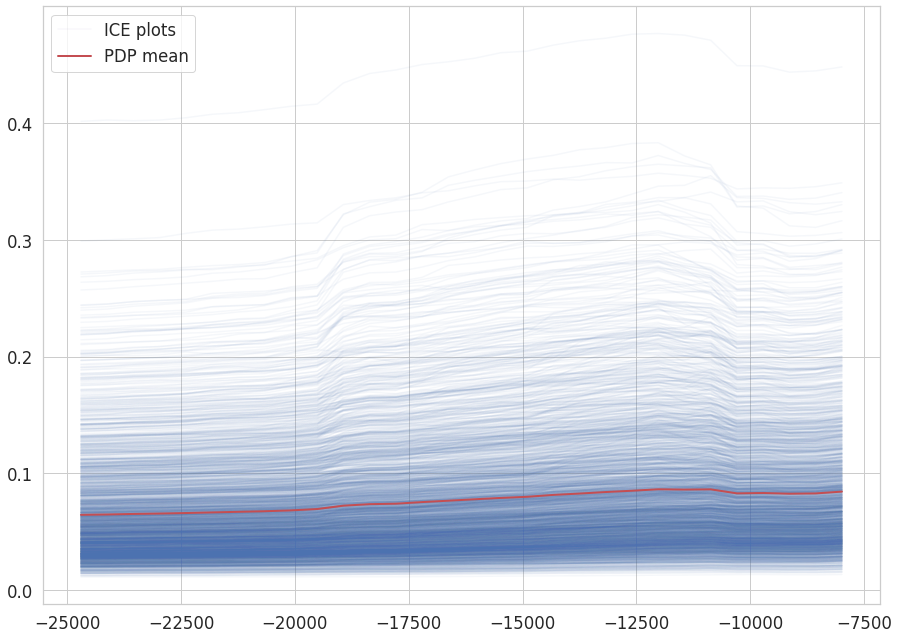

CPU times: user 5.14 s, sys: 97.3 ms, total: 5.24 s
Wall time: 5.39 s


In [ ]:
%%time

X = np.array([item.ravel() for item in ys]).T

plt.figure(figsize=(15, 11))
plt.plot(grid, X[0], alpha=0.05, color='m', label='ICE plots')
for i in range(1, X.shape[0]):
    plt.plot(grid, X[i], alpha=0.05, color='b')
plt.plot(grid, X.mean(axis=0), linewidth=2, color='r', label='PDP mean')
plt.legend()
plt.show()

Or using build-in function.

100%|██████████| 30/30 [00:28<00:00,  1.04it/s]


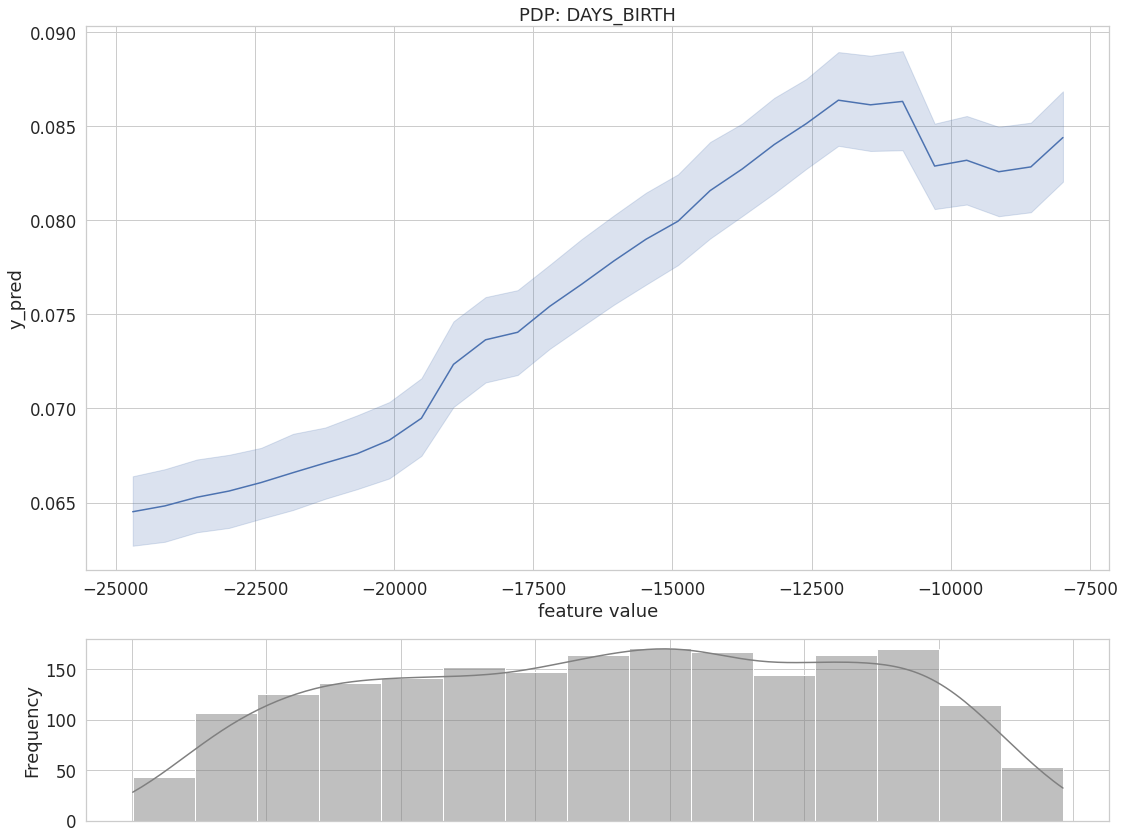

In [ ]:
automl.plot_pdp(test_data, feature_name='DAYS_BIRTH')

100%|██████████| 30/30 [00:18<00:00,  1.63it/s]


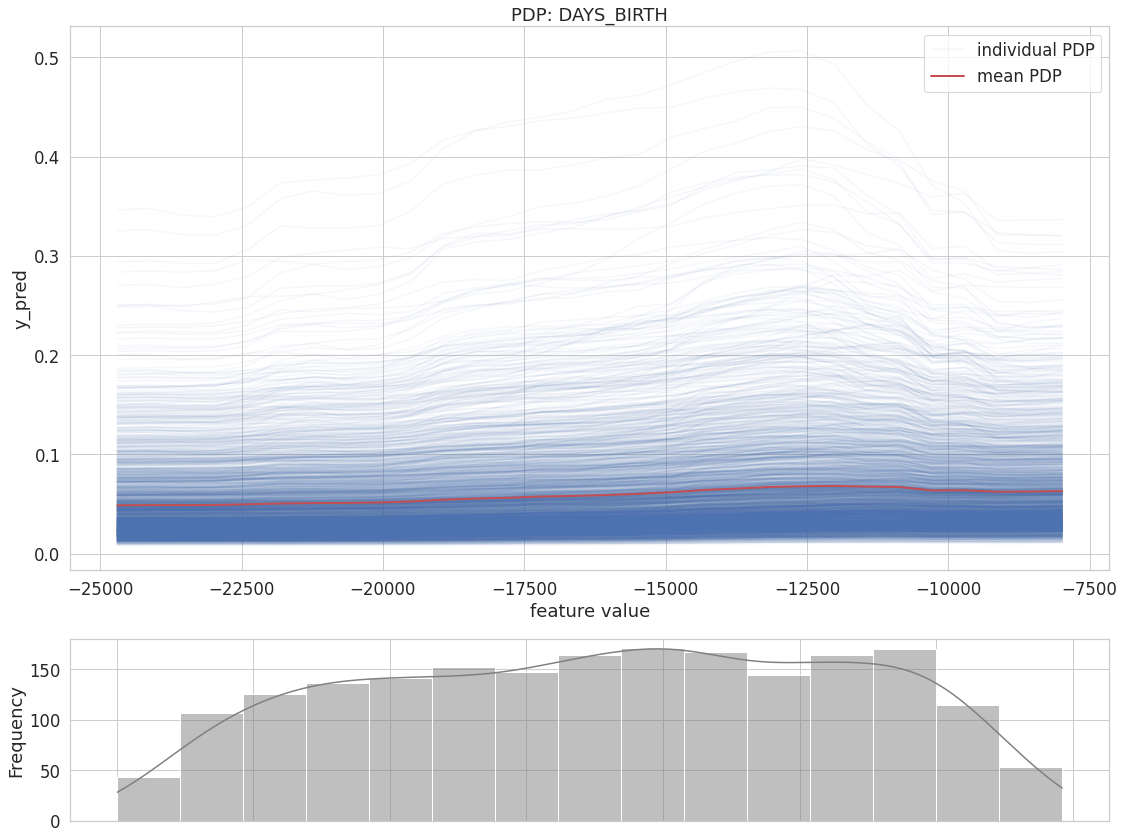

In [ ]:
automl.plot_pdp(test_data, feature_name='DAYS_BIRTH', individual=True)

### 3.2 Categorical features

100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


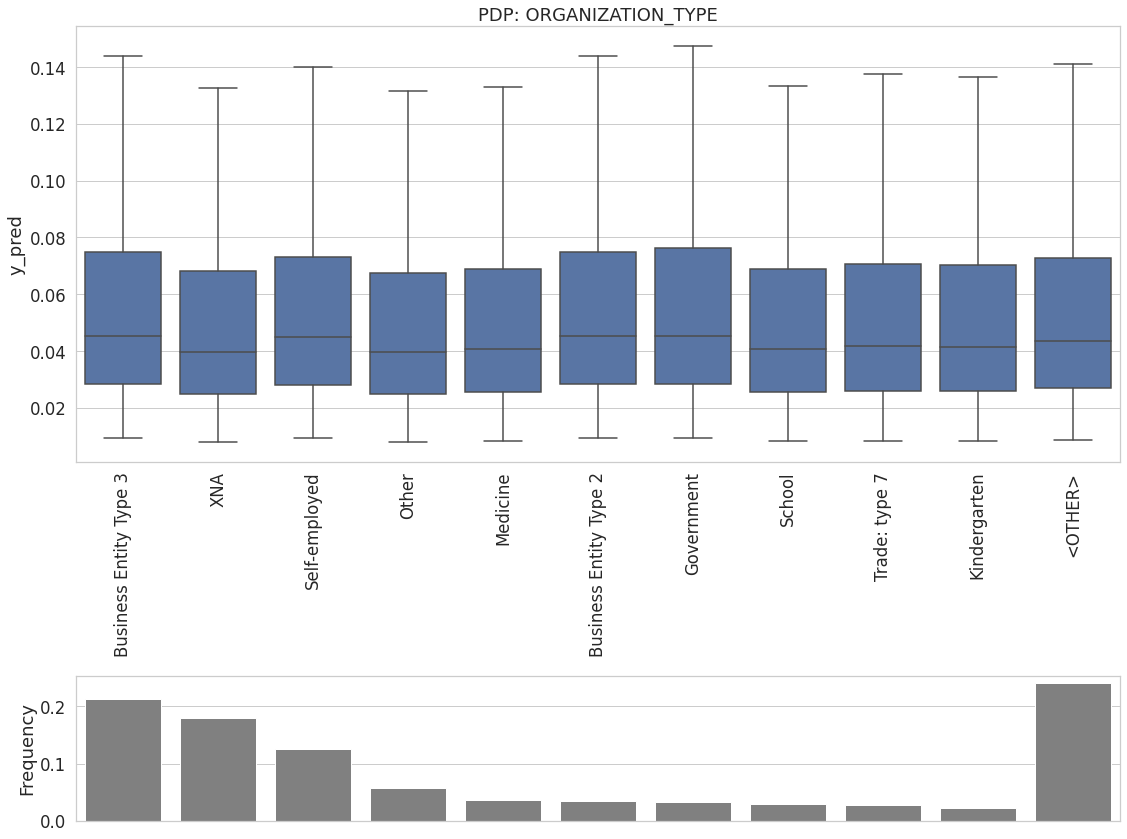

CPU times: user 43.8 s, sys: 2.54 s, total: 46.4 s
Wall time: 6.87 s


In [ ]:
%%time

automl.plot_pdp(test_data, feature_name='ORGANIZATION_TYPE')

### 3.3 Dates

You can specify intervals for division: ``year``, ``month``, ``dayofweek``.

100%|██████████| 45/45 [00:27<00:00,  1.63it/s]


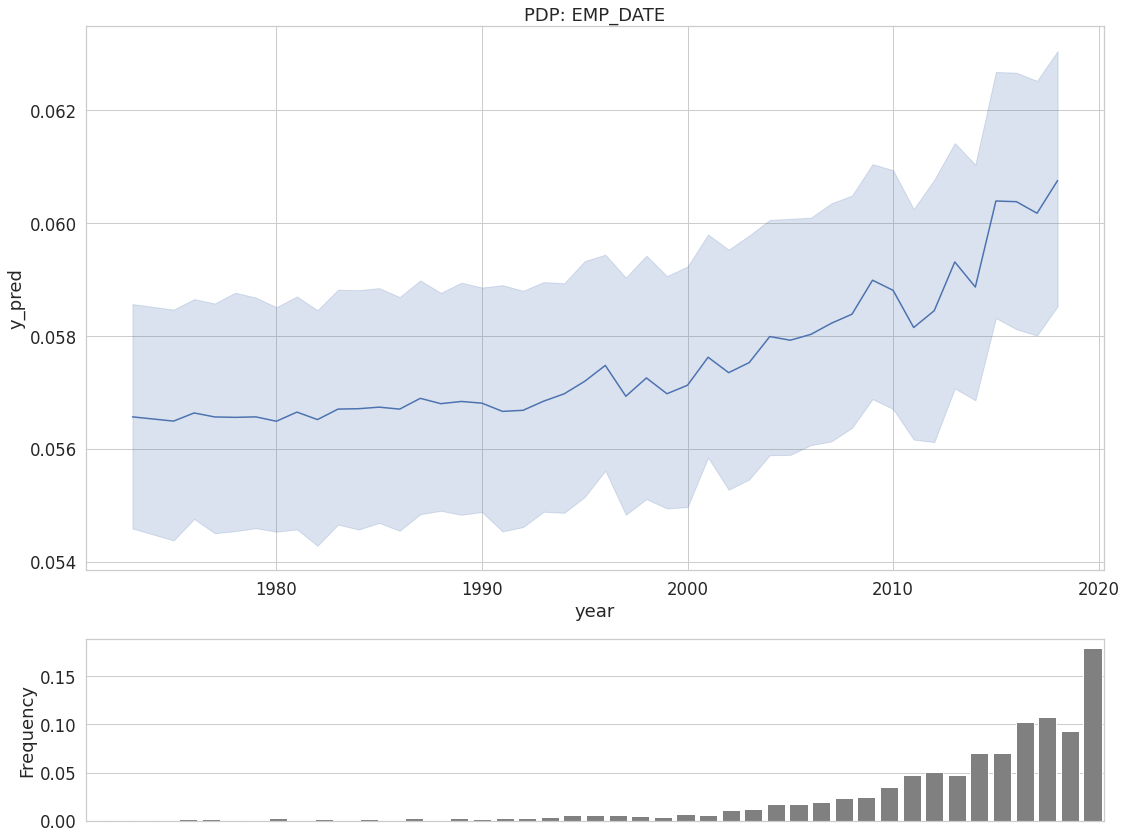

CPU times: user 3min 2s, sys: 10.2 s, total: 3min 12s
Wall time: 29.4 s


In [ ]:
%%time

automl.plot_pdp(test_data, feature_name='EMP_DATE', datetime_level='year')